## Experiments processed to table
- model evaluated by `run_eval_good.py`
- print the results in latex table.
- check the config file `table_trans_rot_kitti_apollo.yaml`.
    

In [48]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
os.chdir('../deepFEPE/')
print(os.getcwd())

/home/yoyee/Documents/deepSfm/deepFEPE


In [57]:
%load_ext autoreload
%autoreload 2
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Use utils.eval_tools to print tables

In [58]:
import logging
import argparse
import yaml
from settings import EXPER_PATH

logging.basicConfig(format='[%(asctime)s %(levelname)s] %(message)s',
                    datefmt='%m/%d/%Y %H:%M:%S', level=logging.DEBUG)

# add parser
parser = argparse.ArgumentParser(description='Foo')

# Training command
parser.add_argument('config', type=str)
parser.add_argument('exper_name', type=str)
args = parser.parse_args('configs/table_trans_rot_kitti_apollo.yaml table_rot_test'.split())
print(args)

## load configs
with open(args.config, 'r') as f:
    config = yaml.load(f)
output_dir = os.path.join(EXPER_PATH, args.exper_name)
print(output_dir)
# print(f"config: {config}")


Namespace(config='configs/table_trans_rot_kitti_apollo.yaml', exper_name='table_rot_test')
logs/table_rot_test


In [ ]:
## read results
from utils.eval_tools import Exp_table_processor
# seq_dict_name = 'seq_dict_ablation_kitti_apollo' # 'seq_dict_poses' # seq_dict_ablation, seq_dict_ablation_kitti, seq_dict_ablation_kitti_apollo
# seq_dict_name = ['seq_dict_ablation_kitti']

def table_config(mode=""):
    table_list = []
    if mode == 'kitti':
        seq_dict_name = ['seq_dict_ablation_kitti', 'seq_dict_ablation_kitti_apollo'] # 'seq_dict_poses' # seq_dict_ablation, seq_dict_ablation_kitti, seq_dict_ablation_kitti_apollo
        table_list = ['table_kittiModels_ours_kit', 'table_kittiModels_baselines_kit',
                      'table_kittiModels_our_apo', 'table_kittiModels_baselines_apo']
    elif mode == 'apollo':
        ### new apollo set: train_seq_2
        seq_dict_name = ['seq_dict_ablation_apollo_new_kitti', 'seq_dict_ablation_apollo_new_apollo'] # 'seq_dict_poses' # seq_dict_ablation, seq_dict_ablation_kitti, seq_dict_ablation_kitti_apollo
        model_base = 'apollo'
        table_list = ['table_apolloModels_ours_kit', 'table_apolloModels_baselines_kit', 
                      'table_apolloModels_our_apo', 'table_apolloModels_baselines_apo'] # 'seq_dict_poses' # seq_dict_ablation, seq_dict_ablation_kitti, seq_dict_ablation_kitti_apollo
    elif mode == 'gt':
        # extract gt
        seq_dict_name = ['seq_dict_gt']  
        
    elif mode == 'test':
        seq_dict_name = ['seq_dict_test']
    
    return seq_dict_name, table_list
        
# read the sequences
mode = 'test' # 'apollo', 'kitti'
seq_dict_name, table_list = table_config(mode=mode)

table_processor = Exp_table_processor(config, seq_dict_name=seq_dict_name, debug=True)
table_processor.get_result_dict(if_print=True)
table_processor.print_tables(if_name=True, table_list=table_list)


## Plot out the errors (deg)

[07/10/2020 14:01:40 DEBUG] Loaded backend module://ipykernel.pylab.backend_inline version unknown.
[07/10/2020 14:01:40 DEBUG] update_title_pos
[07/10/2020 14:01:40 DEBUG] update_title_pos


arr: (5804,)


[07/10/2020 14:01:40 DEBUG] update_title_pos
[07/10/2020 14:01:40 DEBUG] update_title_pos


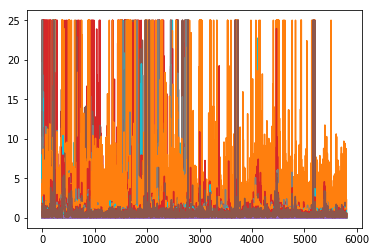

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline

exp_dict = table_processor.exp_dict
err_mat = ['err_q', 'err_t']
est_dict = {}

for i, exp in enumerate(exp_dict):
#     exp_dict[exp][]
    est_dict[exp] = {}
    for en in err_mat:
        arr = exp_dict[exp][en]
        arr = np.clip(arr, 0, 25)
        est_dict[exp][en] = arr
        plt.plot(arr)
print(f"arr: {arr.shape}")


plt.show()

In [3]:
### plot to tensorboard!
from tensorboardX import SummaryWriter
#SummaryWriter encapsulates everything


In [ ]:
for i, en in enumerate(est_dict):
    writer = SummaryWriter(f'runs/exp/plot_acc_{en}_1115')
    result_dict = est_dict[en]
    print(f"en: {en}")
    write_to_writer(writer, result_dict)

In [172]:
en = 'Sp-D-end-k-f-p.k'
result_dict = est_dict[en]
writer = SummaryWriter(f'runs/exp/plot_acc_{en}_1115')
write_to_writer(writer, result_dict)

## Relative pose

In [39]:
## read the results under 'seq_dict_name'

config['data']['base_path'] = '/home/yoyee/Documents/deepSfm/deepFEPE/logs/'
# config['data']['s.k'] = ['eval_sift_deepF', 'opencv_8p_err_ratio.npz']
seq_dict_name = ['seq_dict_test']
table_processor = Exp_table_processor(config, seq_dict_name=seq_dict_name, debug=True)
table_processor.get_result_dict(if_print=True)


[07/11/2020 11:01:53 DEBUG] folder_list: {'Si.k': PosixPath('/home/yoyee/Documents/deepSfm/deepFEPE/logs/baselineTrain_deepF_kitti_fLoss_v1_30.0k_kittiTestall_test_0708/opencv_8p_err_ratio.npz'), 'Si-D.k': PosixPath('/home/yoyee/Documents/deepSfm/deepFEPE/logs/baselineTrain_deepF_kitti_fLoss_v1_30.0k_kittiTestall_test_0708/DeepF_err_ratio.npz'), 'Sp-D-end-k-f-p.k': PosixPath('/home/yoyee/Documents/deepSfm/deepFEPE/logs/baselineTrain_kittiSp_deepF_end_kittiFLossPoseLoss_v1_freezeSp_38.0k_kittiTestall_test_0708/DeepF_err_ratio.npz'), 'Sp-k.k': PosixPath('/home/yoyee/Documents/deepSfm/deepFEPE/logs/baselineTrain_kittiSp_deepF_end_kittiFLossPoseLoss_v1_freezeSp_38.0k_kittiTestall_test_0708/opencv_8p_err_ratio.npz')}


len of exp_dict: 4
err_mat: ['err_q', 'err_t', 'epi_dists'], exp_names: ['Si.k', 'Si-D.k', 'Sp-D-end-k-f-p.k', 'Sp-k.k']
- name: Si.k
exp_dict[exp]: ['err_q', 'err_t', 'epi_dists', 'relative_poses_cam', 'relative_poses_body']
  - exp: err_q
[0.01111111 0.06774194 0.42688172 0.81648746 0.97383513 0.99677419
 0.99784946 0.99784946 0.99784946 0.99784946]
exp_dict[exp]: ['err_q', 'err_t', 'epi_dists', 'relative_poses_cam', 'relative_poses_body']
  - exp: err_t
[3.58422939e-04 7.16845878e-04 5.37634409e-03 2.36559140e-02
 8.35125448e-02 3.89964158e-01 7.34767025e-01 9.00358423e-01
 9.75268817e-01 9.92473118e-01]
exp_dict[exp]: ['err_q', 'err_t', 'epi_dists', 'relative_poses_cam', 'relative_poses_body']
  - exp: epi_dists
[0.02956989 0.04584229 0.09612903 0.17727599 0.33114695 0.6265233
 0.8116129  0.89917563 0.93473118 0.94677419]
- name: Si-D.k
exp_dict[exp]: ['err_q', 'err_t', 'epi_dists', 'relative_poses_cam', 'relative_poses_body']
  - exp: err_q
[0.02544803 0.14802867 0.64408602 0.9383

### get absolute poses by accumulate them

In [43]:
## get absolute poses by accumulate them

poses_abs = []
poses_abs.append(np.identity(4)[:3])
last_pose = np.identity(4)
seq = 'Sp-k.k' # 'Si-D-k-f.k'
from numpy.linalg import inv
# for i, pose in enumerate(table_processor.exp_dict['Si-D-k-f.k']['relative_poses_body']):
for i, pose in enumerate(table_processor.exp_dict[seq]['relative_poses_body']):
# for i, pose in enumerate(table_processor.exp_dict[seq]['relative_poses_cam']):
#     print(f"{i}: {pose}")
    last_pose = pose @ last_pose  ## make sure the multiplication order.
    poses_abs.append(inv(last_pose)[:3])
    if i<5: print(f"pose abs {i}: {poses_abs[-1]}")
    
print(f"pose abs: {len(poses_abs)}")


pose abs 0: [[ 9.99951437e-01 -3.78254508e-03  9.10037539e-03  1.42027220e-01]
 [ 3.77492550e-03  9.99992510e-01  8.54313187e-04 -4.26491379e-03]
 [-9.10353871e-03 -8.19918459e-04  9.99958226e-01  9.89306302e-01]]
pose abs 1: [[ 9.99834562e-01 -5.10721857e-03  1.74575259e-02  1.30821925e-01]
 [ 5.08909684e-03  9.99986465e-01  1.08231443e-03 -2.24738588e-02]
 [-1.74628173e-02 -9.93292329e-04  9.99847020e-01  1.98856509e+00]]
pose abs 2: [[ 9.99784252e-01 -8.90695671e-03  1.87647192e-02  1.87758367e-01]
 [ 8.90975389e-03  9.99960305e-01 -6.54671357e-05 -5.01609133e-02]
 [-1.87633913e-02  2.32642041e-04  9.99823925e-01  2.98647193e+00]]
pose abs 3: [[ 9.99826103e-01 -6.92610357e-03  1.73145351e-02  2.12279527e-01]
 [ 6.97004693e-03  9.99972636e-01 -2.47888918e-03 -3.47608717e-02]
 [-1.72968922e-02  2.59914123e-03  9.99847019e-01  3.98613656e+00]]
pose abs 4: [[ 9.99897421e-01 -4.60830704e-03  1.35614061e-02  9.97734277e-02]
 [ 4.66731832e-03  9.99979764e-01 -4.32298596e-03 -4.57186144e-02

In [44]:
## export to sequence 09, 10

from pathlib import Path
poses_abs_tmp = poses_abs[:1591]
folder = 'logs/trajectory/sp_ran_kitti/'
Path(f'{folder}/09').mkdir(parents=True, exist_ok=True)
Path(f'{folder}/10').mkdir(parents=True, exist_ok=True)
np.savetxt(f'{folder}/09/09.txt', np.stack(poses_abs_tmp).reshape(-1, 12), delimiter=' ')
poses_abs_tmp = poses_abs[1591:]
np.savetxt(f'{folder}/10/10.txt', np.stack(poses_abs_tmp).reshape(-1, 12), delimiter=' ')

### Compare with gt using small snippet ATE

In [45]:
# get_ate_error
gt_path = 'datasets/kitti_gt_poses/'
poses_abs_tmp = poses_abs[:1591]
seq = '09'
poses_gt = table_processor.read_gt_poses(path=gt_path, seq=seq)
data = table_processor.pose_seq_ate(poses_abs_tmp, poses_gt, 5)
aligned_poses = data['aligned_poses']
print(f"aligned_poses: {aligned_poses[:2]}")
# np.savetxt('logs/trajectory/kitti_est_10_spDEnd_full_1106.txt', np.stack(poses_abs).reshape(-1, 12), delimiter=' ')
# np.savetxt('logs/trajectory/test.txt', np.stack(poses_abs_tmp).reshape(-1, 12), delimiter=' ')
np.savetxt('logs/trajectory/09/09.txt', np.stack(poses_abs_tmp).reshape(-1, 12), delimiter=' ')

[07/11/2020 11:28:06 INFO] read from: datasets/kitti_gt_poses//09.txt



Results
	        ATE,         RE
mean 	     0.0342,     0.0059
std 	     0.0541,     0.0079
aligned_poses: [array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.]]), array([[ 9.99951437e-01, -3.78254508e-03,  9.10037539e-03,
         4.70742549e-01],
       [ 3.77492550e-03,  9.99992510e-01,  8.54313187e-04,
        -1.41358564e-02],
       [-9.10353871e-03, -8.19918459e-04,  9.99958226e-01,
         3.27900926e+00]])]


## Random testing scripts

In [182]:
## load kitti poses gt file
import dsac_tools.utils_misc as utils_misc
filename = '/data/kitti/odometry/poses/09.txt'
poses = (
    np.genfromtxt(filename)
    .astype(np.float32)
    .reshape(-1, 3, 4)
)

def get_relative_poses(poses, delta_ij=1):
    poses_list = []
    for frame_num in range(len(poses)-delta_ij):
        j = delta_ij + frame_num
        relative_scene_pose = np.linalg.inv(
            utils_misc.Rt_pad(poses[j])
        ) @ utils_misc.Rt_pad(poses[frame_num])
        poses_list.append(relative_scene_pose)
    return poses_list


poses_list = get_relative_poses(poses, delta_ij=1)
data = relative_poses_to_rt(poses_list)

print(f"original poses: {poses[:4]}")
print(f"relative poses_list: {poses_list[:4]}")
print(f"inv poses_list: {np.linalg.inv(poses_list[:4])}")
print(f"rot: {data['rot'][:4]}, trans: {data['trans'][:4]}")




rot_list: 1590, trans_list: 1590
original poses: [[[ 1.000000e+00  1.197625e-11  1.704638e-10  5.551115e-17]
  [ 1.197625e-11  1.000000e+00  3.562503e-10  0.000000e+00]
  [ 1.704638e-10  3.562503e-10  1.000000e+00  2.220446e-16]]

 [[ 9.999268e-01 -3.092411e-03  1.169425e-02  2.138869e-02]
  [ 3.079219e-03  9.999946e-01  1.146026e-03 -8.456433e-03]
  [-1.169773e-02 -1.109933e-03  9.999310e-01  2.880714e-01]]

 [[ 9.998143e-01 -5.167713e-03  1.856600e-02  3.879027e-02]
  [ 5.141246e-03  9.999857e-01  1.473072e-03 -1.513783e-02]
  [-1.857335e-02 -1.377345e-03  9.998266e-01  5.807338e-01]]

 [[ 9.997542e-01 -8.010201e-03  2.067129e-02  5.418066e-02]
  [ 8.008308e-03  9.999679e-01  1.744436e-04 -2.008116e-02]
  [-2.067202e-02 -8.857983e-06  9.997863e-01  8.792349e-01]]]
relative poses_list: [array([[ 0.99992687,  0.00307922, -0.01169773, -0.01799131],
       [-0.00309241,  0.99999464, -0.00110993,  0.00884227],
       [ 0.01169425,  0.00114603,  0.999931  , -0.28829193],
       [ 0.       

### check reproducibility
- load two dict of results
- compare if they are exactly the same

In [40]:
import numpy as np
from numpy.linalg import norm as norm
base_path = 'logs/results'
folder_list = [f'{base_path}/baselineTrain_deepF_kitti_fLoss_v1_30.0k_kittiTestall_1107', 
               f'{base_path}/baselineTrain_deepF_kitti_fLoss_v1_30.0k_kittiTestall_1107']
err_mat = ['err_q', 'err_t']
result_names = ['DeepF_err_ratio.npz', 'DeepF_err_ratio.npz']
exp_list = []

exp_list = read_file_to_list(folder_list, result_names)
    
def check_reproducibility():
    # compare dictions
    for en in err_mat:
        err_dict = exp_list[0]

        # print lists
        def print_dict(err_dict):
            print(f"{list(err_dict)}")
            for en_1 in list(err_dict):
                print(f"[{en_1}]: {err_dict[en_1].shape}")
        print_dict(err_dict)

        for i in range(1, len(exp_list)):
            print_dict(exp_list[i])
            print(f"shape: list[0][{en}].shape = {err_dict[en].shape}, list[{i}][{en}].shape = {exp_list[i][en].shape}")        
            print(f"diff: {err_dict[en] - exp_list[i][en]}")
    #         if norm(, ord='fro') != 0:
    #             print(f"list[0][{en}] != list[{i}][{en}]")
    pass

# check_reproducibility()
    

len of exp_list: 2


### Get inlier ratio

### Create overleaf tables

```
% Please add the following required packages to your document preamble:
% \usepackage{multirow}
\begin{table}[]
\begin{tabular}{|l|l|l|l|}
\hline
\multirow{2}{*}{Model}             & \multicolumn{2}{l|}{rotation} &  \\ \cline{2-4} 
                                   & 0.1 px         & 1 px         &  \\ \hline
Baseline                           &                &              &  \\ \hline
Model adapted on KITTI             &                &              &  \\ \hline
Model trained on KITTI             &                &              &  \\ \hline
Model trained and adapted on KITTI &                &              &  \\ \hline
\end{tabular}
\end{table}
```

```
% Please add the following required packages to your document preamble:
% \usepackage{multirow}
\begin{table}[]
\begin{tabular}{|l|l|l|l|l|l|l|l|l|l|l|l|l|l|l|l|l|l|l|l|l|l|l|l|}
\hline
\multirow{2}{*}{Model}             & \multicolumn{10}{l|}{rotation}                                 & \multicolumn{10}{l|}{translation}                           & \multicolumn{3}{l|}{epi\_dist} \\ \cline{2-24} 
                                   & 0.01 px & 0.02 & 0.05 & 0.1 & 0.2 & 0.5 & 1.0 & 2.0 & 5.0 & 10 & 0.01 & 0.02 & 0.05 & 0.1 & 0.2 & 0.5 & 1.0 & 2.0 & 5.0 & 10 & 0.01      & 0.1      & 1.0     \\ \hline
Baseline                           &         &      &      &     &     &     &     &     &     &    &      &      &      &     &     &     &     &     &     &    &           &          &         \\ \hline
Model adapted on KITTI             &         &      &      &     &     &     &     &     &     &    &      &      &      &     &     &     &     &     &     &    &           &          &         \\ \hline
Model trained on KITTI             &         &      &      &     &     &     &     &     &     &    &      &      &      &     &     &     &     &     &     &    &           &          &         \\ \hline
Model trained and adapted on KITTI &         &      &      &     &     &     &     &     &     &    &      &      &      &     &     &     &     &     &     &    &           &          &         \\ \hline
\end{tabular}
\end{table}
```